<a href="https://colab.research.google.com/github/sota1111/DL_Zero4/blob/main/DL_Zero4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
os.chdir('/content/drive/MyDrive/DL_Zero/DL_Zero4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git config --global user.email "sota.moro@gmail.com"
!git config --global user.name "sota1111"

In [3]:
!pip install numpy matplotlib ipython scikit-learn pandas pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# 1章 バンディット問題

## 1.1 機械学習の分類と強化学習

### 1.1.1 教師あり学習

### 1.1.2 教師なし学習

### 1.1.3 強化学習

## 1.2 バンディット問題

### 1.2.1 バンディット問題とは
バンディット：スロットマシンの別称  
バンディット問題における強化学習の枠組みを考える  
- 環境：スロットマシン
- エージェント：プレイヤー
- 行動：プレイヤーは複数台あるスロットマシンから1台を選んでプレイする。  
- 報酬：行動の結果、スロットマシンから受け取るコイン

### 1.2.2 良いスロットマシンとは
スロットマシンをプレイするような確率的事象は「期待値」を使って評価できる。

### 1.2.3 数式を使って表す
確率変数：取る値が確率的に決まる変数
- A：エージェントの行う行動
- E：期待値
- R：報酬
- E[R]：報酬Rの期待値
- E[R|A]：Aという行動を選んだ場合の報酬の期待値  
| の右側に条件を記述
- Q:行動価値
q(A)=E[R|A]

## 1.3 バンディットアルゴリズム
プレイヤーは報酬の期待値が分からない状態で、できるだけ精度良く推定することが求められる。

## 1.4 価値の推定方法
スロットマシンを実際にプレイして得られた報酬→標本平均

### 1.3.2 平均値を求める実装

In [5]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):# 1~10まで
  reward = np.random.rand() # ダミーの報酬
  rewards.append(reward)
  Q = sum(rewards) / n
  print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


Qn-1 = (R1+R2+...+Rn-1)/(n-1)を用いて  
Qn   = (R1+R2+...+Rn)nを変形すると、  
Qn = Qn-1+1/n*(Rn-Qn-1)  
行動価値Qnは前回の行動価値と今回の報酬によって決まる。  
ここで、1/nは学習率としての役割がある。  


In [6]:
Q = 0

for n in range(1,11):
  reward = np.random.rand()
  Q = Q + (reward - Q)/n
  print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


### 1.3.3 プレイヤーの戦略
- 活用：プレイした結果を利用して、最善と思われるスロットマシンをプレイ（=greedyな行動)
- 探索：スロットマシンの価値を精度良く推定するために、様々なスロットマシンを試す
活用と探索はトレードオフ  
ε-greeedy法：最も基本的で応用の聞くアルゴリズム。  
εの確率で活用を行う。

## 1.4 バンディットアルゴリズムの実装

### 1.4.1 スロットマシンの実装

In [7]:
#　各マシンを初期化した値より小さい値の場合１を返す
import numpy as np

class Bandit:
  def __init__(self, arms=10):
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [8]:
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

1
1
1


### 1.4.2 エージェントの実装

In [9]:
bandit = Bandit()
Q = 0

for n in range(1,11):
  reward = bandit.play(0) #0番目のマシンをプレイ
  Q += (reward - Q) / n
  print(Q)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6


In [10]:
# 上のプログラムを配列化しただけ
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(1, 10) #ランダムな行動
  reward = bandit.play(action)

  ns[action] += 1
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
# 各マシンの報酬を返す。ε-greedyに従ってactionを選択する
class Agent:
  def __init__(self, epsilon, action_size=10):
    self.epsilon = epsilon
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self, action, reward):
    self.ns[action] += 1
    self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))#epsilon 
    return np.argmax(self.Qs)#greedy

### 1.4.3 動かしてみる

872


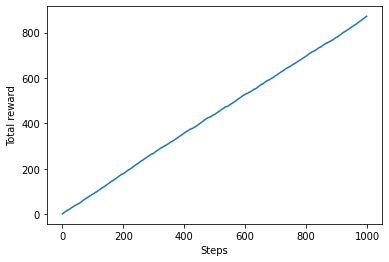

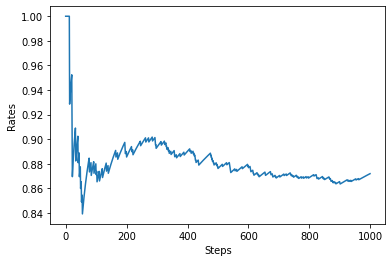

In [12]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()  #①行動を選択
  reward = bandit.play(action) #②実際にプレイした報酬を得る
  agent.update(action, reward) #③行動と報酬から学ぶ
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# グラフの描画（１）
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

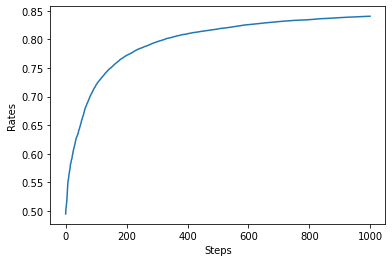

In [13]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  total_rewards = []
  rates = []
  
  for step in range(steps):
    action = agent.get_action()  #①行動を選択
    reward = bandit.play(action) #②実際にプレイした報酬を得る
    agent.update(action, reward) #③行動と報酬から学ぶ
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

  all_rates[run] = rates # ①報酬の結果を記録する
  
avg_rates = np.average(all_rates, axis=0) # ②各ステップにおける平均を求める

# グラフの描画
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## 1.5 非定常問題
- 定常問題：報酬の確率分布が定常である
- 非定常問題：報酬の確率分布が変動する

In [14]:
# 定常問題
class Bandit:
  def __init__(self, arms=10):
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [15]:
# 非定常問題
class NonStatBandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    self.rates += 0.1 * np.random.randn(self.arms) # ノイズを追加
    if rate > np.random.rand():
      return 1
    else:
      return 0

### 1.5.1 非定常問題を解くためには
Qn = Qn-1+1/n*(Rn-Qn-1)の1/nをα(0<α<1)に変更  
Qn = Qn-1+α*(Rn-Qn-1)
上記のように変形すると、過去の報酬は指数関数的に減少する。

### 1.5.2 非定常問題を解く

In [16]:
class AlphaAgent:
  def __init__(self, epsilon, alpha, actions=10):
    self.epsilon = epsilon
    self.Qs = np.zeros(actions)
    self.alpha = alpha

  def update(self, action, reward):
    # alphaで更新
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

956


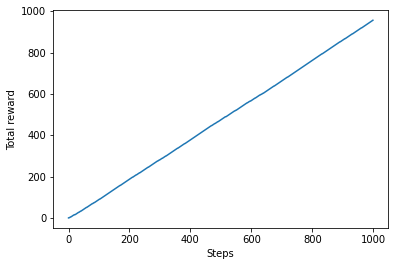

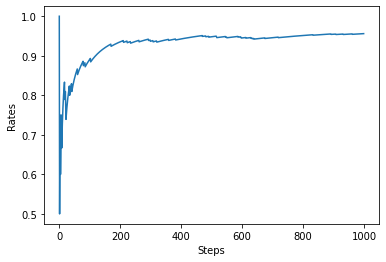

In [17]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1
alpha = 0.8

bandit = NonStatBandit()
agent = AlphaAgent(epsilon, alpha)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()  #①行動を選択
  reward = bandit.play(action) #②実際にプレイした報酬を得る
  agent.update(action, reward) #③行動と報酬から学ぶ
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# グラフの描画（１）
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

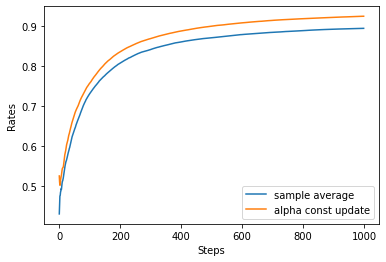

In [18]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for n_alpha in range(2):
  for run in range(runs):
    bandit = NonStatBandit()
    if n_alpha == 0:
      agent = Agent(epsilon)
    else:
      agent = AlphaAgent(epsilon, alpha)

    
    total_reward = 0
    total_rewards = []
    rates = []
    
    for step in range(steps):
      action = agent.get_action()  #①行動を選択
      reward = bandit.play(action) #②実際にプレイした報酬を得る
      agent.update(action, reward) #③行動と報酬から学ぶ
      total_reward += reward

      total_rewards.append(total_reward)
      rates.append(total_reward / (step+1))

    all_rates[run] = rates # ①報酬の結果を記録する
    
  avg_rates = np.average(all_rates, axis=0) # ②各ステップにおける平均を求める

  # グラフの描画
  plt.ylabel('Rates')
  plt.xlabel('Steps')
  plt.plot(avg_rates)
plt.legend(["sample average", "alpha const update"])
plt.show()

# 2章 マルコフ決定過程
エージェントの行動によって環境の状態が変化する問題を考える。  
そのような問題の一部は**マルコフ決定過程**として定式化される。  

## 2.1 MDPとは
- MDP：Mrkov Dicision Process
- 決定過程：エージェントが（環境と相互作用しながら）行動を決定する過程

### 2.1.1 MDPの具体例
- 状態：エージェントの行動により変わるエージェントの状況

### 2.1.2 エージェントと環境のやりとり

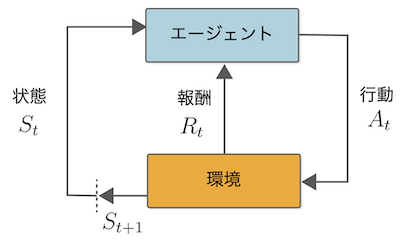

In [19]:
from IPython.display import Image,display_png
display_png(Image('MDPのサイクル.png'))

## 2.2 環境とエージェントの定式化
以下の三つを数式により定式化する
- 状態遷移：状態はどのように遷移するのか
- 報酬：報酬はどのように与えられるか
- 方策：エージェントはどのように行動を決定するか

### 2.2.1 状態遷移
決定論的な状態遷移の場合、次の状態s'は状態sと行動aによって一意に決まる。  
s' = f(s, a)  
f(s, a)：状態遷移関数
確率論的な状態遷移の場合、エージェントが状態sで、行動aを行った時、次の状態s'に移動する確率  
p(s'|s, a)：状態遷移確率  

マルコフ性：現在の状態sと行動aだけに依存して、次の状態s'が決まる

### 2.2.2 報酬関数
報酬関数：エージェントが状態sにいて、行動aを行い、次の状態s'になった時に得られる報酬をr(s, a, s')で定義  


### 2.2.3 エージェントの方策
- 決定論的な方策：a=u(s)
- 確率論的な方策：π(a|s)  
ある状態sにいる時に行動aを取る確率

## 2.3 MDPの目標
- 方策π(a|s)によって行動し、
- その行動と状態遷移確率p(s'|s, a)によって次の状態に遷移し、
- 報酬関数r(s, a, s')に従って報酬が与えられる。
最大方策：上記の枠組みの中で、収益が最大となる最適方策を見つける。

## 2.3.1 エピソードタスクと連続タスク
- エピソードタスク：終わりのある問題
- 連続タスク：終わりのない問題

### 2.3.2 収益
収益Gt=Rt0+rRt1+r^2*Rt2+...
r：割引率

### 2.3.3 状態価値関数
収益の期待値：vπ(s)=E[Gt|St=s, π]  
vπ(s)：状態価値関数


### 2.3.4 最適方策と最適価値関数
v*：最適状態価値関数

## 2.4 MDPの例

# 3章 ベルマン方程式
ベルマン方式式：MDPで成り立つ最も重要な方程式

## 3.1 ベルマン方程式の導出

## 3.1.1 確率と期待値
p(y|x)：条件付き確率
p(x,y)=p(x)p(y|x)：xとyが同時に起こる確率

### 3.1.2 ベルマン方程式の導出
